# **Project : A Case Study of ExpressWay Logistics**

**Business Overview:**

ExpressWay Logistics is a dynamic logistics service provider, committed to delivering efficient, reliable and cost-effective courier transportation and warehousing solutions. With a focus on speed, precision and customer satisfaction, we aim to be the go-to partner for our customers seeking seamless courier services. Our core service involves ensuring operational efficiency throughout our delivery and courier services, including inventory management, durable packaging and swift dispatch of couriers, real time tracking of shipments and on-time delivery of couriers as promised. We are committed to enhance our logistics and courier services and improve seamless connectivity for our customers.

**Current Challenge:**

ExpressWay Logistics faces numerous challenges in ensuring seamless deliveries and customer satisfaction. These challenges include managing various customer demands simultaneously, addressing delays in deliveries and ensuring products arrive intact and safe. Additionally, the company struggles with complexity of efficiently storing and handling a large volume of packages and ultimately meeting customer expectations. Moreover, maintaining a skilled workforce capable of handling various aspects of logistics operations presents its own set of challenges. Overcoming these obstacles requires a comprehensive approach that integrates innovative technology, strategic planning, and continuous improvement initiatives to ensure smooth operations and exceptional service delivery.

**Objective:**

Our primary objective is to conduct a sentiment analysis of user-generated reviews across various digital channels and platforms. By paying attention to their feedback, we want to find ways to make our services better - like handling different customer demands simultaneously, dealing with late deliveries, and keeping packages secured and intact. Through the application of prompt engineering methodologies and sentiment analysis, we'll figure out if sentiments expressed by users for our courier services are Positive or Negative. This will help us understand where we need to improve in order to meet customer expectations and keep them happy. With a focus on getting better all the time, we'll overcome the challenges at ExpressWay Logistics and make our services the best.

**Data Description:**

The dataset titled "courier-service_reviews.csv" is structured to facilitate sentiment analysis for courier service reviews. Here's a brief description of the data columns:

1. id: This column contains unique identifiers for each review entry. It helps in distinguishing and referencing individual reviews.
2. review: This column includes the actual text of the courier service reviews. The reviews are likely composed of customer opinions and experiences regarding different aspects of the services provided by ExpressWay Logistics.
3. sentiment: This column provides an additional layer of classification (positive and negative) for the mentioned reviews.

### **Instructions for Successfully Completing the Project**

**Project flow**

**Step 1: Authentication & Setup → Step 2: Assemble Data → Step 3: Derive Prompts → Step 4: Evaluate Prompts → Step 5: Observations & Business Insights**

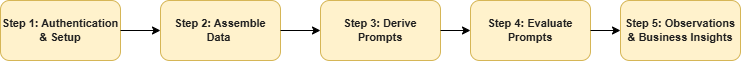

1. **Follow the steps in sequence** – Complete each step correctly before moving to the next, as the project is builded sequentially.  

2. **Replace placeholders with actual code** – Fill in the blanks ("__________") with the appropriate code to execute the tasks correctly.  

3. **Apply prompt engineering concepts** – Implement both **zero-shot** and **few-shot** prompting techniques. Use zero-shot prompting to understand how the model performs without any examples and few-shot prompting to provide few examples to guide the model in generating more accurate responses.  

4. **Evaluate model predictions** – Use **Micro-F1 score** to measure the accuracy of sentiment classification. Micro-F1 score is beneficial because it balances precision and recall across all classes, treating each instance equally.

5. **Analyze business impact** – Interpret the sentiment analysis results to provide insights that can help **ExpressWay Logistics** improve customer service and satisfaction.

##**Step 1. Setup (2 Marks)**


### Installation

In [1]:
#import sys
#!{sys.executable} -m pip install tabulate

In [2]:
#!pip install -q openai==1.55.3 tiktoken==0.6.0 datasets session-info --quiet

In [3]:
#import sys
#!{sys.executable} -m pip install wordcloud

### Imports

In [4]:
#!pip install tabulate

In [5]:
#!pip install tabulate

In [6]:
#!pip install wordcloud

In [7]:
# Import all Python packages required to access the Azure Open AI API.
# Import additional packages required to access datasets and create examples.

from openai import AzureOpenAI
import json
import random
import tiktoken
import session_info

import pandas as pd
import numpy as np

from collections import Counter
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tabulate import tabulate
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [8]:
session_info.show()

### API Setup


To set up OpenAI API in your code, you'll require the following components:

- AZURE_OPENAI_KEY
- AZURE_OPENAI_ENDPOINT
- CHATGPT_MODEL
- AZURE_OPENAI_APIVERSION

1. **Launch OpenAI Studio -** In the ‘Overview’ section of the OpenAI Resource Page, click on "Go to Azure AI Foundary Portal" option. This will take you to the AI Studio page.
2. **Go to Chat Playground -** Click on “Open in Playground” or directly go to the 'Chat' section on the left menu bar.
3. **Click on 'View Code' -** Once inside the Chat Playground, confirm that the selected deployment is correct. Locate the "View Code" option, then click on it.
4. **Find Config details -** Go to the tab “Key authentication” and scroll down to find out all the required OpenAI API configuration details.


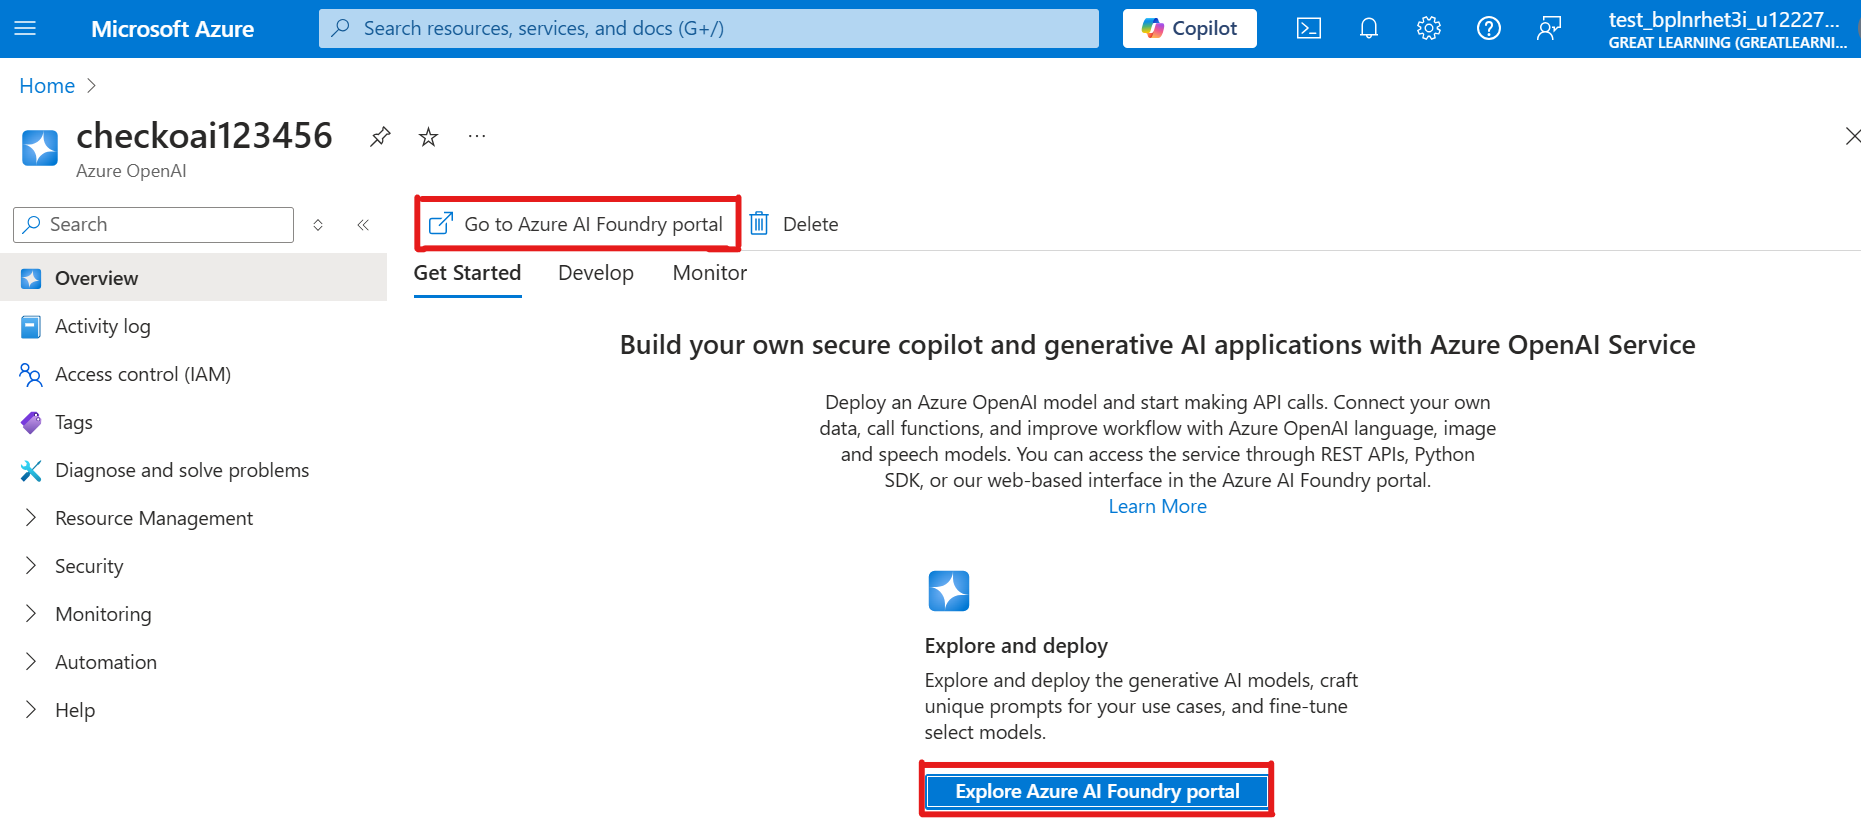

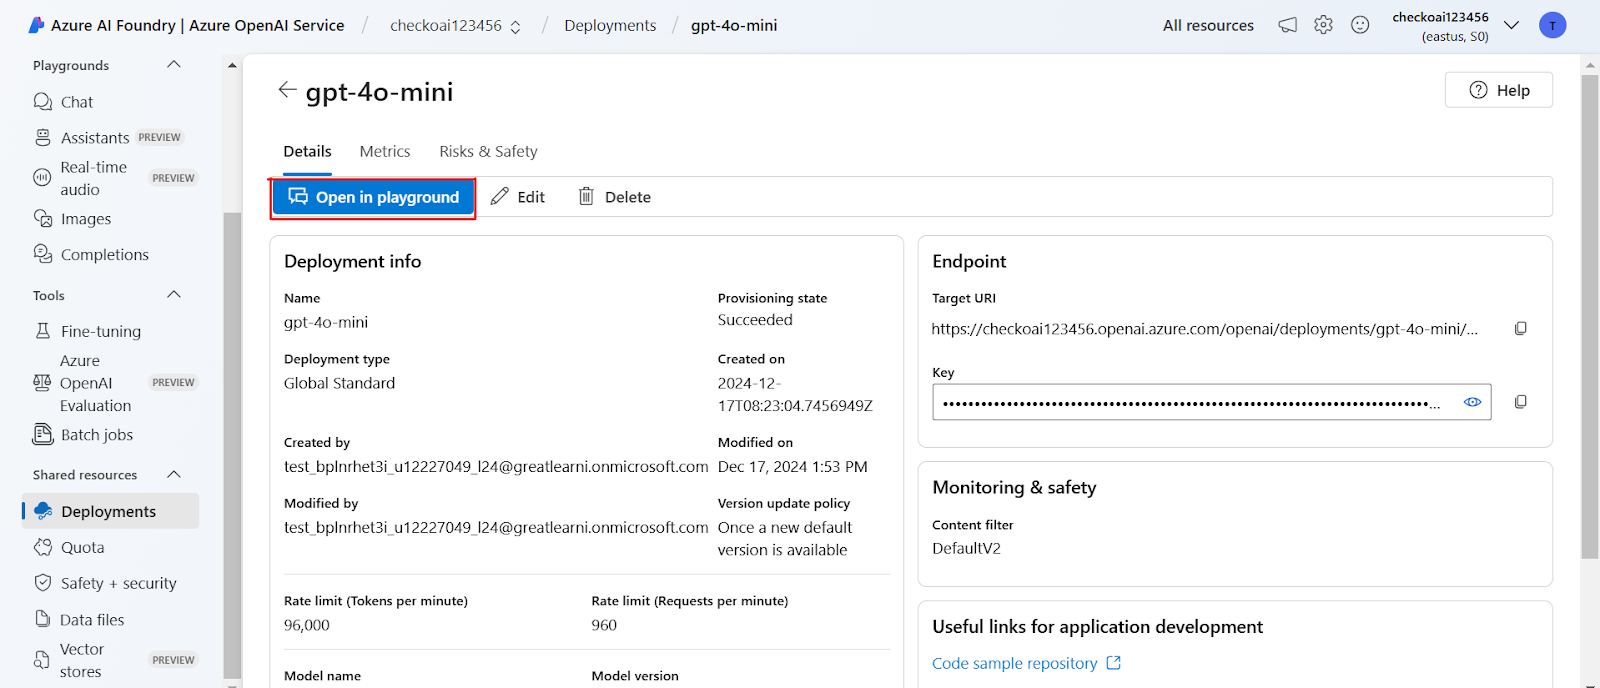

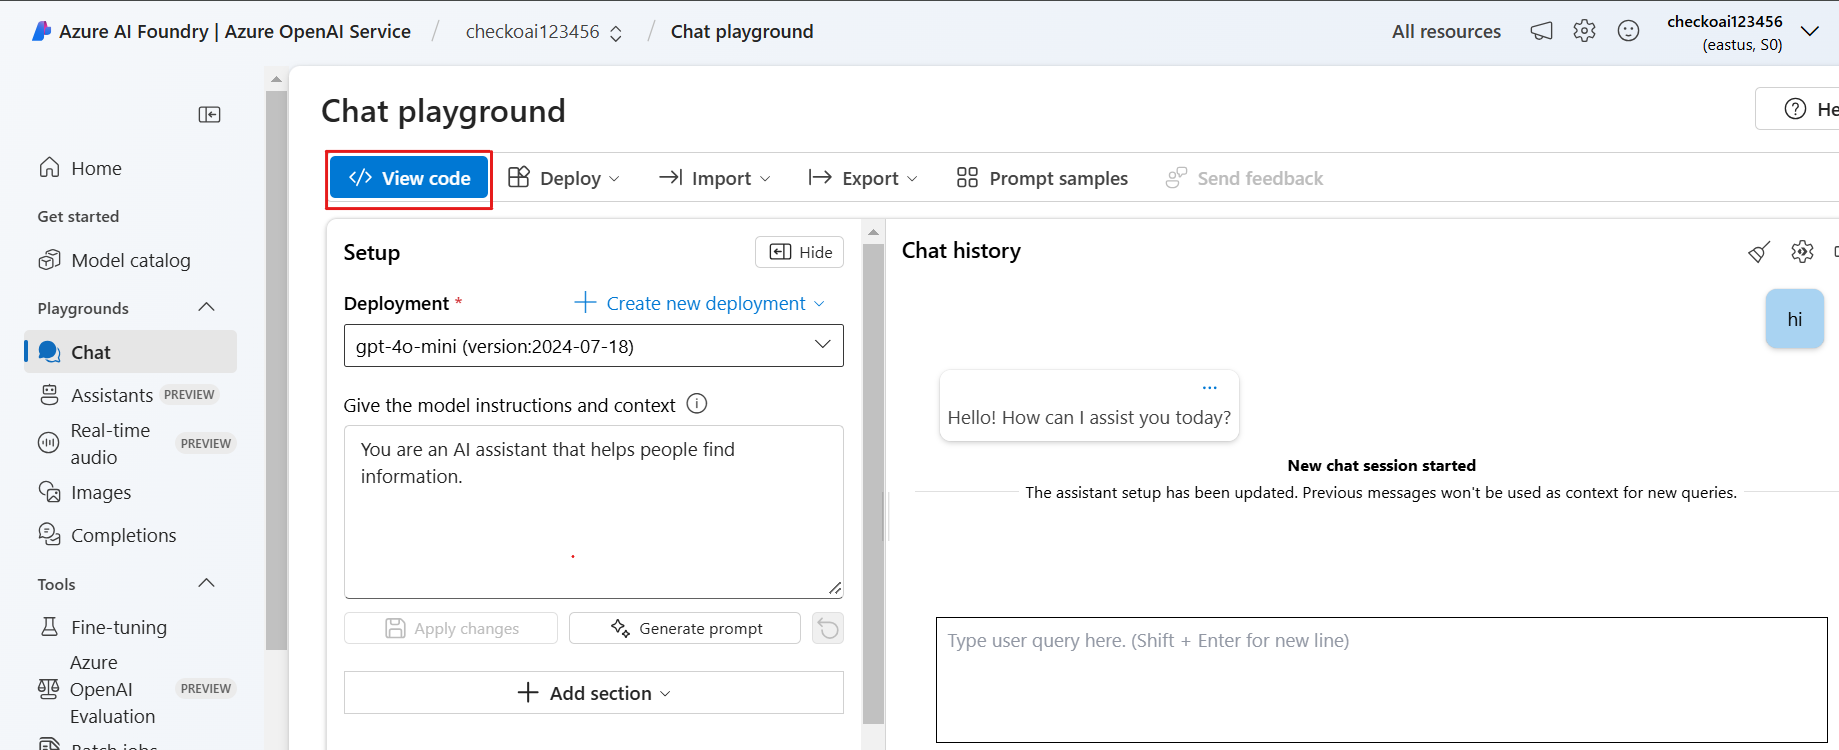

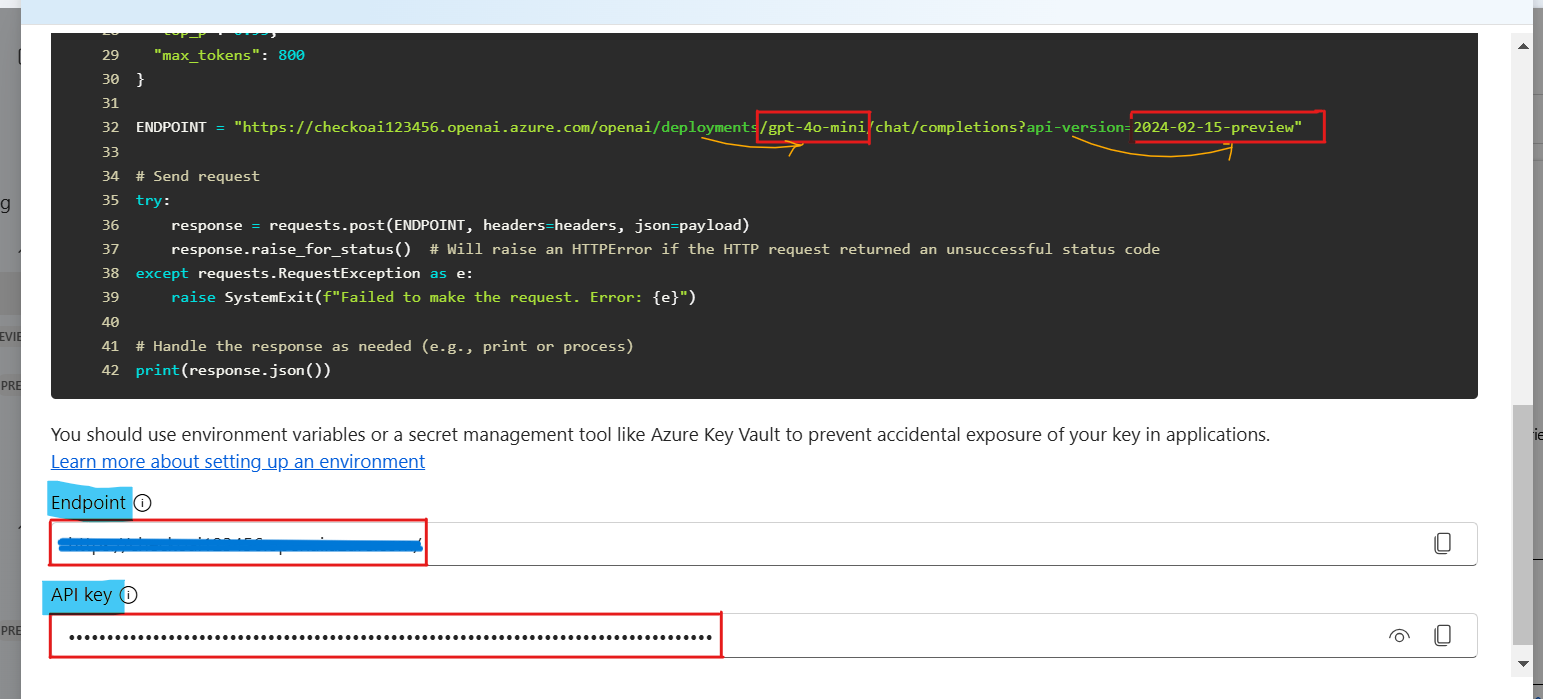

For the above test credentials, the API configuration are as follows:
```
config_data = {
    "AZURE_OPENAI_KEY": "#*9jO#**#Swg8h#*zut*#*mvJv#*99AACYeB*#*OGJa3*",
    "AZURE_OPENAI_ENDPOINT": "https://#bcd1&3*45#.openai.azure.com/",
    "AZURE_OPENAI_APIVERSION": "2024-02-15-preview:",
    "CHATGPT_MODEL": "gpt-4o-mini"
}
```
** **Do not copy the above shown test credentials. it's just for reference, fetch the credentials from Azure lab**

**View FAQ Section to get more detailed setp-by-step setup to deploy and fetch Azure OpenAI gpt-4o-mini endpoint credentials**

### Authentication

**Goal:** Set up authentication to connect with Azure OpenAI API which is crucial for the project because proper authentication ensures secure and authorized access to the API. Without this setup, we won't be able to access gpt-4o-mini endpoint. We specifically use the gpt-4o-mini model because it offers optimized performance for smaller tasks while balancing capability and efficiency. Its lower latency and resource usage make it an ideal choice for this project

**Task:**
  1. Create a config.json file to store API credentials securely.
  2. Read the credentials from the file and initialize the Azure OpenAI client.
  3. Understand the working of the ```num_tokens_from_messages``` function to count the number of tokens in a given prompt.

**Marks Split-up:**

(A) Writing/Creating the config.json file  (2 Marks)

**(A) Writing/Creating the config.json file (2 Marks)**

In [11]:
with open('config.json', 'r') as az_creds:
    data = az_creds.read()

In [12]:
creds = json.loads(data)

In [13]:
client = AzureOpenAI(
    azure_endpoint=creds["AZURE_OPENAI_ENDPOINT"],
    api_key=creds["AZURE_OPENAI_KEY"],
    api_version=creds["AZURE_OPENAI_APIVERSION"]
)

In [14]:
chat_model_id = creds["CHATGPT_MODEL"]

### Utilities

This function calculates the number of tokens used in a list of messages, which is useful for estimating API usage costs in OpenAI models. It first sets up token encoding based on the gpt-4 model. Each message is counted with an overhead of three tokens due to the special formatting (<|start|>, role (system, user, or assistant), and <|end|>). It then iterates through the messages, encoding and counting tokens for each key-value pair. Finally, an additional three tokens are added to account for the assistant's reply formatting.

In [15]:
def num_tokens_from_messages(messages):

    """
    Return the number of tokens used by a list of messages.
    Adapted from the Open AI cookbook token counter
    """

    encoding = tiktoken.encoding_for_model("gpt-4")

    # Each message is sandwiched with <|start|>role and <|end|>
    # Hence, messages look like: <|start|>system or user or assistant{message}<|end|>

    tokens_per_message = 3 # token1:<|start|>, token2:system(or user or assistant), token3:<|end|>

    num_tokens = 0

    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))

    num_tokens += 3  # every reply is primed with <|start|>assistant<|message|>

    return num_tokens

## Task : Sentiment Analysis

##**Step 2: Assemble Data (5 Marks)**


**Goal:** Load the dataset to gain insights into its structure and distribution, which helps preparing it for an effective sentiment analysis.

**Task:**
1. Upload and read CSV file into a Pandas DataFrame.
2. Analyze sentiment distribution by counting positive and negative reviews to check if the data is balanced. Ensuring a well-distributed dataset prevents model bias and helps maintain rationality in predictions.
3. Split the dataset into:
  * Training set (80%) (cs_examples_df) – Used for creating prompts.
  The training set consists of 80% of the dataset and is primarily used to create prompts for the sentiment classification. This dataset also provides examples that help in constructing few-shot prompts, where the model is given labeled instances to improve its accuracy.
  * Gold examples (20%) (cs_gold_examples_df) – This subset is not used for training but used for evaluating the model's performance. The purpose of this set is to act as a ground truth—a reference dataset against which the model’s predictions can be compared. This helps assess how well the model generalizes to unseen data and provides a way to compute accuracy metrics like the Micro-F1 score.

**Marks Split-up:**

(A) Upload and Read csv File (2 Marks)

(B) Count Positive and Negative Sentiment Reviews (1 Marks)

(C) Split the Dataset (2 Marks)

**(A) Upload and read csv file (2 Marks)**

In [16]:
cs_reviews_df = pd.read_csv('datasets/courier-service_reviews-1.csv')
# Read CSV File Here

In [17]:
cs_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         131 non-null    int64 
 1   review     131 non-null    object
 2   sentiment  131 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [18]:
cs_reviews_df.shape

(131, 3)

In [19]:
cs_reviews_df.sample(5)

,id,review,sentiment
72,73,I just wanted to take a moment to thank Expres...,Positive
44,45,As a small business owner with unique shipping...,Positive
3,4,Expressway Logistics is the worst courier serv...,Negative
17,18,ExpressWay Logistics could enhance their value...,Negative
46,47,ExpressWay Logistics' delivery drivers seem to...,Negative


**(B) Count Positive and Negative Sentiment Reviews (1 Marks)**

In [20]:
cs_reviews_df['sentiment'].value_counts()

sentiment
Positive    68
Negative    63
Name: count, dtype: int64

**(C) Split the Dataset (2 Marks)**

In [21]:
cs_examples_df, cs_gold_examples_df = train_test_split(
    cs_reviews_df, #<- the full dataset
    test_size=0.2, #<- 20% random sample selected for gold examples
    random_state=42#, #<- ensures that the splits are the same for every session
    #stratify=cs_reviews_df['sentiment'] # maintain class proportion
)

In [22]:
(cs_examples_df.shape, cs_gold_examples_df.shape)

((104, 3), (27, 3))

To select gold examples for this session, we sample randomly from the test data using a `random_state=42`. This ensures that the examples from multiple runs of the sampling are the same (i.e., they are randomly selected but do not change between different runs of the notebook). Note that we are doing this only to keep execution times low for illustration. In practise, large number of gold examples facilitate robust estimates of model accuracy.

In [23]:
columns_to_select = ['review','sentiment']

In [24]:
gold_examples = (
        cs_gold_examples_df.loc[:, columns_to_select]
                                     .sample(21, random_state=42) #<- ensures that gold examples are the same for every session
                                     .to_json(orient='records')
)

In [25]:
gold_examples

'[{"review":"The delivery executive assigned by ExpressWay Logistics was courteous and professional during the delivery process. They tried their best to handle the package with care.Unfortunately, the package arrived with slight damage despite the delivery executive\'s efforts. The packaging seemed more than adequate to protect the contents during transit.","sentiment":"Positive"},{"review":"ExpressWay Logistics failed to meet my expectations. The delivery was delayed, and the customer support team was unresponsive and unhelpful when I tried to inquire about the status of my parcel.","sentiment":"Negative"},{"review":"ExpressWay Logistics\' incompetence resulted in a major inconvenience when my package was delivered to the wrong recipient. Despite providing accurate delivery information, the package ended up in the hands of someone else, and efforts to retrieve it were unsuccessful. When I contacted customer service for assistance, I was met with apathy and a lack of urgency. Their fa

In [26]:
json.loads(gold_examples)[0]     #Json format

{'review': "The delivery executive assigned by ExpressWay Logistics was courteous and professional during the delivery process. They tried their best to handle the package with care.Unfortunately, the package arrived with slight damage despite the delivery executive's efforts. The packaging seemed more than adequate to protect the contents during transit.",
 'sentiment': 'Positive'}

##**Step 3: Derive Prompt (12 Marks)**


**Goal:** Construct Zero-Shot and Few-Shot Prompts for Sentiment Classification.

**Task:**
1. Write a Zero-Shot System Message – Define clear instructions for the model to classify reviews strictly as "Positive" or "Negative" without using other sentiments or explanations.
2. Create a Zero-Shot Prompt – Construct a proper prompt by including the system message and a user message.
3. Write a Few-Shot System Message – Define few-shot system message which is similar to zero-shot system message.
4. Create Examples for Few-Shot Prompt – Extract balanced examples (equal number of positive and negative reviews) from the dataset using the function create_examples(), ensuring a diverse and representative sample.
5. Assemble Few-Shot Prompt – Build a few-shot prompt by integrating
  * A well-structured few-shot system message.
  * labeled examples (review + sentiment).
  * A user input "review" for classification.

**Marks Split-up:**

(A) Write Zero Shot System Message (3 Marks)

(B) Create Zero Shot Prompt (2 Marks)

(C) Write Few Shot System Message (3 Marks)

(D) Create Examples For Few shot prompte (2 Marks)

(E) Create Few Shot Prompt (2 Marks)

In [27]:
user_message_template = """```{courier_service_review}```"""

**(A) Write Zero Shot System Message (3 Marks)**

In [28]:
#zero_shot_system_message = """
#Classify the sentiment of following review present in the input into one of the following Sentiments category:
#Positive
#Negative
#review will be delimited by triple backticks in the input
#Response with one word either Positive or Negative with same case. Nothing Else. Do not include explanations or any special character. 
#""" 
## Write zero shot system message here

In [29]:
zero_shot_system_message = zero_shot_system_message = """
You are a sentiment analysis assistant. Your task is to classify the sentiment of a single review 
enclosed within triple backticks. The sentiment categories are:

- Positive
- Negative

Instructions:
1. Respond with exactly one word: 'Positive' or 'Negative' (case-sensitive).
2. Do NOT include explanations, punctuation, or special characters.
3. Consider the full text carefully before determining the sentiment.

The review will be provided in the input between triple backticks.
"""

**(B) Create Zero Shot Prompt (2 Marks)**

In [30]:
zero_shot_prompt = [{'role':'system', 'content': zero_shot_system_message}]
# Create zero shot prompt to be input ready for completion function

In [31]:
num_tokens_from_messages(zero_shot_prompt)

104

**(C) Write Few Shot System Message (3 Marks)**

In [32]:
#few_shot_system_message = """Classify the following reviews presented in the input into one of following categories:
#Positive
#Negative
#review will be delimited by triple backticks in the input
#Response with one word either Positive or Negative with same case. Nothing Else. Do not include explanations or any special character.
#Given below are the few samples as an examples
#"""

In [33]:
few_shot_system_message = """You are a sentiment analysis assistant. Your task is to classify the sentiment of a single review 
enclosed within triple backticks. The sentiment categories are:

- Positive
- Negative

Instructions:
1. Respond with exactly one word: 'Positive' or 'Negative' (case-sensitive).
2. Do NOT include explanations, punctuation, or special characters.
3. Consider the full text carefully before determining the sentiment.

The review will be provided in the input between triple backticks.
Given below are the few samples as an examples:
"""

Merely selecting random samples from the polarity subsets is not enough because the examples included in a prompt are prone to a set of known biases such as:
 - Majority label bias (frequent answers in predictions)
 - Recency bias (examples near the end of the prompt)


To avoid these biases, it is important to have a balanced set of examples that are arranged in random order. Let us create a Python function that generates bias-free examples:

```create_examples``` function generates a randomized set of example reviews with equal representation from two sentiment classes: Positive and Negative. It first filters the dataset into two separate groups based on sentiment labels. Then, it randomly selects `n` examples from each class and combines them into a single dataset. The combined examples are shuffled to ensure randomness before being converted into a JSON format. Each time the function runs, it produces a different set of randomized examples from the dataset.

In [34]:
def create_examples(dataset, n=4):

    """
    Return a JSON list of randomized examples of size 2n with two classes.
    Create subsets of each class, choose random samples from the subsets,
    merge and randomize the order of samples in the merged list.
    Each run of this function creates a different random sample of examples
    chosen from the training data.

    Args:
        dataset (DataFrame): A DataFrame with examples (review + label)
        n (int): number of examples of each class to be selected

    Output:
        randomized_examples (JSON): A JSON with examples in random order
    """

    positive_reviews = (dataset.sentiment == 'Positive')
    negative_reviews = (dataset.sentiment == 'Negative')
    columns_to_select = ['review', 'sentiment']

    positive_examples = dataset.loc[positive_reviews, columns_to_select].sample(n)
    negative_examples = dataset.loc[negative_reviews, columns_to_select].sample(n)

    examples = pd.concat([positive_examples, negative_examples])

    # sampling without replacement is equivalent to random shuffling

    randomized_examples = examples.sample(2*n, replace=False)

    return randomized_examples.to_json(orient='records')

**(D) Create Examples For Few shot prompte (2 Marks)**

In [35]:
examples = create_examples(cs_reviews_df, n=5)
# Create Examples

In [36]:
json.loads(examples)

[{'review': 'As a frequent traveler, I often use ExpressWay Logistics to ship luggage and personal belongings ahead of time. Their door-to-door service and reliable tracking make traveling a breeze.',
  'sentiment': 'Positive'},
 {'review': 'ExpressWay Logistics is known for its prompt delivery times.It ensured that my parcels arrive well ahead of schedule.I am happy with the service.',
  'sentiment': 'Positive'},
 {'review': "The packaging used by ExpressWay Logistics for my shipment was inadequate and resulted in damage to the contents. Despite being marked as fragile, the items were poorly packed and insufficiently protected, leading to breakage during transit. The lack of care and attention to detail from ExpressWay Logistics' staff is concerning, and I'm disappointed by their failure to ensure the safe delivery of my belongings.",
  'sentiment': 'Negative'},
 {'review': "ExpressWay Logistics' refusal to take responsibility for their mistakes is infuriating. Instead of owning up to

With the examples in place, we can now assemble a few-shot prompt. Since we will be using the few-shot prompt several times during evaluation, let us write a function to create a few-shot prompt (the logic of this function is depicted below).

create_prompt function constructs a few-shot prompt formatted for the OpenAI API, incorporating system instructions, example interactions, and a user message template. It starts by adding the system message, which provides guidelines for sentiment analysis. Then, it loops through the provided examples, formatting each review as a user message and its corresponding sentiment as an assistant response. These are appended to the prompt list in the required sequence. The final output is a structured list of dictionaries that can be directly used as input for an OpenAI model.

In [37]:
def create_prompt(system_message, examples, user_message_template):

    """
    Return a prompt message in the format expected by the Open AI API.
    Loop through the examples and parse them as user message and assistant
    message.

    Args:
        system_message (str): system message with instructions for sentiment analysis
        examples (str): JSON string with list of examples
        user_message_template (str): string with a placeholder for courier service reviews

    Output:
        few_shot_prompt (List): A list of dictionaries in the Open AI prompt format
    """

    few_shot_prompt = [{'role':'system', 'content': system_message}]

    for example in json.loads(examples):
        example_review = example['review']
        example_sentiment = example['sentiment']

        few_shot_prompt.append(
            {
                'role': 'user',
                'content': user_message_template.format(
                    courier_service_review=example_review
                )
            }
        )

        few_shot_prompt.append(
            {'role': 'assistant', 'content': f"{example_sentiment}"}
        )

    return few_shot_prompt

**(E) Create Few Shot Prompt (2 Marks)**

In [38]:
few_shot_prompt = create_prompt(
    few_shot_system_message,
    examples,
    user_message_template
)
# Create Few shot prompt

In [39]:
few_shot_prompt

[{'role': 'system',
  'content': "You are a sentiment analysis assistant. Your task is to classify the sentiment of a single review \nenclosed within triple backticks. The sentiment categories are:\n\n- Positive\n- Negative\n\nInstructions:\n1. Respond with exactly one word: 'Positive' or 'Negative' (case-sensitive).\n2. Do NOT include explanations, punctuation, or special characters.\n3. Consider the full text carefully before determining the sentiment.\n\nThe review will be provided in the input between triple backticks.\nGiven below are the few samples as an examples:\n"},
 {'role': 'user',
  'content': '```As a frequent traveler, I often use ExpressWay Logistics to ship luggage and personal belongings ahead of time. Their door-to-door service and reliable tracking make traveling a breeze.```'},
 {'role': 'assistant', 'content': 'Positive'},
 {'role': 'user',
  'content': '```ExpressWay Logistics is known for its prompt delivery times.It ensured that my parcels arrive well ahead of 

In [40]:
num_tokens_from_messages(few_shot_prompt)

761

##**Step 4: Evaluate prompts (8 Marks)**


**Goal:** Evaluate zero-shot and few-shot prompting predictions using Micro-F1 score.

**Task:**

1. Evaluate Zero-Shot Prompt – Use gold examples to measure prediction accuracy.
2. Evaluate Few-Shot Prompt – Measure accuracy after incorporating few-shot examples.
3. Run multiple evaluations (5 times) – Assess variability in performance.
4. Calculate Mean & Standard Deviation – Measure consistency of results

**Marks Split-up:**

(A) Evaluate Zero Shot Prompt (2 Marks)

(B) Evaluate Few Shot Prompt (2 marks)

(C) Calculate Mean and Standard Deviation for Zero Shot Prompt and Few Shot Prompt (4 Marks)

Now we have two sets of prompts that we need to evaluate using gold labels. Since the few-shot prompt depends on the sample of examples that was drawn to make up the prompt, we expect some variability in evaluation. Hence, we evaluate each prompt multiple times to get a sense of the average and the variation around the average.

To reiterate, a choice on the prompt should account for variability due to the choice of the random sample. To aid repeated evaluation, we assemble an evaluation function .

The ```evaluate_prompt``` function evaluates the performance of a sentiment analysis model using a micro-F1 score by comparing its predictions to gold-standard examples. It iterates through gold examples, formats each review into a user input message, and appends it to the provided prompt. The prompt is then sent to the OpenAI model for prediction, ensuring deterministic outputs by setting a low temperature and restricting the token limit. The predicted sentiments are collected alongside ground truth labels for evaluation. Finally, the function calculates and prints the micro-F1 score while displaying a comparison table of reviews, predictions, and actual labels.









In [41]:
def evaluate_prompt(prompt, gold_examples, user_message_template):

    """
    Return the micro-F1 score for predictions on gold examples.
    For each example, we make a prediction using the prompt. Gold labels and
    model predictions are aggregated into lists and compared to compute the
    F1 score.

    Args:
        prompt (List): list of messages in the Open AI prompt format
        gold_examples (str): JSON string with list of gold examples
        user_message_template (str): string with a placeholder for courier service review

    Output:
        micro_f1_score (float): Micro-F1 score computed by comparing model predictions
                                with ground truth
    """

    model_predictions, ground_truths, review_texts = [], [], []

    for example in json.loads(gold_examples):
        gold_input = example['review']
        user_input = [
            {
                'role':'user',
                'content': user_message_template.format(courier_service_review=gold_input)
            }
        ]

        try:
            response = client.chat.completions.create(
                model=chat_model_id,
                messages=prompt+user_input,
                temperature=0, # <- Note the low temperature (For a deterministic response)
                max_tokens=2 # <- Note how we restrict the output to not more than 2 tokens
            )

            prediction = response.choices[0].message.content
            # response = openai.ChatCompletion.create(
            #     deployment_id=chat_model_id,
            #     messages=prompt+user_input,
            #     temperature=0, # <- Note the low temperature(For a deterministic response)
            #     # max_tokens=2 # <- Note how we restrict the output to not more than 2 tokens
            # )

            # prediction = response['choices'][0]['message']['content']
            model_predictions.append(prediction.strip()) # <- removes extraneous white spaces
            ground_truths.append(example['sentiment'])
            review_texts.append(gold_input)

        except Exception as e:
            #print(f"Error for review '{gold_input}': {e}")
            continue

    micro_f1_score = f1_score(ground_truths, model_predictions, average="micro")

    table_data = [[text, pred, truth] for text, pred, truth in zip(review_texts, model_predictions, ground_truths)]
    headers = ["Review", "Model Prediction", "Ground Truth"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    return micro_f1_score


Let us now use this function to do one evaluation of all the two prompts assembled so far, each time computing the Micro-F1 score.

**(A) Evaluate zero shot prompt (2 Marks)**

In [42]:
evaluate_prompt(prompt=zero_shot_prompt, 
                gold_examples=gold_examples, user_message_template=user_message_template)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

0.9047619047619048

**(B) Evaluate few shot prompt (2 Marks)**

In [43]:
evaluate_prompt(
    prompt=few_shot_prompt,       
    gold_examples=gold_examples,
    user_message_template=user_message_template
)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

0.9047619047619048

However, this is just *one* choice of examples. We will need to run these evaluations with multiple choices of examples to get a sense of variability in F1 score for the few-shot prompt. As an example, let us run evaluations for the few-shot prompt 5 times.

This part evaluates the variability of the micro-F1 score for few-shot and zero-shot prompts by running multiple evaluations with different example selections. It loops num_eval_runs times, generating a new random set of examples in each iteration. A zero-shot prompt is created using only system instructions, while a few-shot prompt includes both system instructions and the selected examples. Each prompt is then evaluated on gold-standard examples to measure performance. The resulting micro-F1 scores for both methods are stored in separate lists for further analysis.


In [44]:
num_eval_runs = 5

In [45]:
zero_shot_performance = []
few_shot_performance = []

In [46]:
for _ in tqdm(range(num_eval_runs)):

    # For each run create a new sample of examples
    examples = create_examples(cs_examples_df,n=5)

    # Assemble the zero shot prompt with these examples
    zero_shot_prompt = [{'role':'system', 'content': zero_shot_system_message}]
    # zero_shot_prompt = create_prompt(zero_shot_system_message, examples, user_message_template)

    # Assemble the few shot prompt with these examples
    few_shot_prompt = create_prompt(few_shot_system_message, examples, user_message_template)

    # Evaluate zero shot prompt accuracy on gold examples
    zero_shot_micro_f1 = evaluate_prompt(zero_shot_prompt, gold_examples, user_message_template)

    # Evaluate few shot prompt accuracy on gold examples
    few_shot_micro_f1 = evaluate_prompt(few_shot_prompt, gold_examples, user_message_template)

    zero_shot_performance.append(zero_shot_micro_f1)
    few_shot_performance.append(few_shot_micro_f1)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

 20%|████████████████▊                                                                   | 1/5 [00:28<01:55, 28.83s/it]

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

 40%|█████████████████████████████████▌                                                  | 2/5 [00:59<01:30, 30.03s/it]

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:30<01:00, 30.42s/it]

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [01:58<00:29, 29.28s/it]

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:27<00:00, 29.55s/it]

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------+
| Review                                                                                                                                                                                                                                                                                                                                                                                      

**(C) Calculate Mean and Standard Deviation for Zero Shot Prompt and Few Shot Prompt (4 Marks)**

Compute the average (mean) and measure the variability (standard deviation) of the evaluation scores for both zero shot and few shot prompts.

In [47]:
np.array(zero_shot_performance).mean(), np.array(zero_shot_performance).std()
# Calculate for Zero Shot

(np.float64(0.9047619047619048), np.float64(0.0))

In [48]:
np.array(few_shot_performance).mean(), np.array(few_shot_performance).std()
# Calculate for Few Shot

(np.float64(0.9047619047619048), np.float64(0.0))

##### Since few-shot prompting shows little improvement due to insufficient examples, it’s more cost-effective to use zero-shot prompting.

##**Step 5: Observation and Insights and Business perspective (3 Marks)**




**Goal:** Draw insights from sentiment classification and its impact on the business.

**Task:**
1. Percentage breakdown of positive vs. negative reviews to assess customer sentiment.
2. Provide business insights for ExpressWay Logistics:
  * Address common customer complaints.
  * Improve services based on feedback.
  * Enhance customer satisfaction through data-driven decisions.

**Marks Split-up:**

Based on the projects, learner needs to share observations, learnings, insights and the business use case where these learnings can be beneficial.
Provide a breakdown of the percentage of positive and negative reviews. Additionally, explain how this classification can assist ExpressWay Logistics in addressing the issues identified. (3 Marks)

In [49]:
#def predict_sentiments_and_insights(prompt, gold_examples, user_message_template):
#    """
#    Predict sentiments for the gold examples and generate business insights.
#
#    Args:
#        prompt (List): OpenAI prompt messages (few-shot or zero-shot)
#        gold_examples (str): JSON string of gold examples
#        user_message_template (str): Template with placeholder for review text
#
#    Returns:
#        insights (dict): Dictionary containing:
#            - predictions: list of model predictions
#            - positive_percentage: % of positive reviews
#            - negative_percentage: % of negative reviews
#    """
#
#    model_predictions = []
#    review_texts = []
#
#    for example in json.loads(gold_examples):
#        review_text = example['review']
#
#        # Prepare user input for the model
#        user_input = [
#            {
#                'role': 'user',
#                'content': user_message_template.format(courier_service_review=review_text)
#            }
#        ]
#
#        try:
#            # Call OpenAI chat completion
#            response = client.chat.completions.create(
#                model=chat_model_id,
#                messages=prompt + user_input,
#                temperature=0,  # deterministic
#                max_tokens=2    # short output
#            )
#
#            prediction = response.choices[0].message.content.strip()
#            model_predictions.append(prediction)
#            review_texts.append(review_text)
#
#        except Exception as e:
#            print(f"Error for review '{review_text}': {e}")
#            continue
#
#    # Calculate positive/negative percentages
#    counts = Counter(model_predictions)
#    total = len(model_predictions)
#    positive_percentage = round((counts.get('Positive', 0) / total) * 100, 2)
#    negative_percentage = round((counts.get('Negative', 0) / total) * 100, 2)
#
#    # Print table for review-level predictions
#    table_data = [[text, pred] for text, pred in zip(review_texts, model_predictions)]
#    headers = ["Review", "Model Prediction"]
#    #print(tabulate(table_data, headers=headers, tablefmt="grid"))
#
#    insights = {
#        'predictions': model_predictions,
#        'positive_percentage': positive_percentage,
#        'negative_percentage': negative_percentage
#    }
#
#    print(f"\nPositive Reviews: {positive_percentage}%")
#    print(f"Negative Reviews: {negative_percentage}%")
#
#    #return insights
#

In [50]:
def predict_sentiments_and_insights(prompt, gold_examples, user_message_template):
    """
    Predict sentiments for the gold examples and generate a DataFrame with insights.

    Args:
        prompt (List): OpenAI prompt messages (few-shot or zero-shot)
        gold_examples (str): JSON string of gold examples
        user_message_template (str): Template with placeholder for review text

    Returns:
        insights_df (pd.DataFrame): DataFrame with columns:
            - review: review text
            - actual_sentiment: actual sentiment
            - predicted_sentiment: model prediction
            - mismatch: True if actual != predicted, else False
    """

    reviews = []
    actuals = []
    predictions = []
    mismatches = []

    for example in json.loads(gold_examples):
        review_text = example['review']
        actual_sentiment = example['sentiment']

        # Prepare user input for the model
        user_input = [
            {
                'role': 'user',
                'content': user_message_template.format(courier_service_review=review_text)
            }
        ]

        try:
            # Call OpenAI chat completion
            response = client.chat.completions.create(
                model=chat_model_id,
                messages=prompt + user_input,
                temperature=0,
                max_tokens=2
            )

            predicted_sentiment = response.choices[0].message.content.strip()

            # Append to lists
            reviews.append(review_text)
            actuals.append(actual_sentiment)
            predictions.append(predicted_sentiment)
            mismatches.append(predicted_sentiment != actual_sentiment)

        except Exception as e:
            print(f"Error for review '{review_text}': {e}")
            continue

    # Create DataFrame
    insights_df = pd.DataFrame({
        'review': reviews,
        'actual_sentiment': actuals,
        'predicted_sentiment': predictions,
        'mismatch': mismatches
    })

    # Add summary percentages
    total = len(insights_df)
    positive_percentage = round((insights_df['predicted_sentiment'] == 'Positive').sum() / total * 100, 2)
    negative_percentage = round((insights_df['predicted_sentiment'] == 'Negative').sum() / total * 100, 2)

    print(f"\nPositive Reviews: {positive_percentage}%")
    print(f"Negative Reviews: {negative_percentage}%")
    #print(f"Total mismatches: {insights_df['mismatch'].sum()}")

    return insights_df

In [51]:
insights_df = predict_sentiments_and_insights(prompt=few_shot_prompt, 
                                gold_examples=gold_examples, 
                                user_message_template=user_message_template)


Positive Reviews: 38.1%
Negative Reviews: 61.9%


#### 1. Inference (Sentiment Summary)
From the sentiment analysis, 38.1% of the reviews are positive and 61.9% are negative. This indicates that a majority of customers are dissatisfied with their experience at ExpressWay Logistics. These insights can help the business:

Track customer satisfaction trends over time

Identify recurring pain points

Prioritize service improvements to boost customer loyalty

In [52]:
# Load gold examples as DataFrame
reviews_df = pd.DataFrame(json.loads(gold_examples))

# Filter negative reviews
negative_reviews = reviews_df[reviews_df['sentiment'] == 'Negative']['review']


negative_reviews

1     ExpressWay Logistics failed to meet my expecta...
2     ExpressWay Logistics' incompetence resulted in...
4     ExpressWay Logistics offers a convenient onlin...
8     I appreciated the flexibility offered by Expre...
9     While ExpressWay Logistics' pricing is competi...
11    ExpressWay Logistics has been my go-to courier...
12    ExpressWay Logistics' incompetence led to the ...
13    I was deeply disappointed by the behavior of t...
15    ExpressWay Logistics caught my attention with ...
18    I was initially impressed by ExpressWay Logist...
20    I had a terrible experience with ExpressWay Lo...
Name: review, dtype: object

In [53]:
negative_reviews.iloc[8]

"ExpressWay Logistics caught my attention with its promise of seamless shipping solutions and a comprehensive network. However, my recent experiences have revealed some significant shortcomings. Their online platform is disgusting and their tracking system is inaccurate.I've encountered repeated issues with inaccurate weight calculations that have led to unexpected charges. Moreover, the limited options for customizing shipment preferences have made it challenging to meet my requirements.I cannot rely upon it for my future requirements.It failed to meet my requirements."

In [54]:
positive_reviews = reviews_df[reviews_df['sentiment'] == 'Positive']['review']


positive_reviews

0     The delivery executive assigned by ExpressWay ...
3     Kudos to ExpressWay Logistics for their outsta...
5     Planning a destination wedding is undoubtedly ...
6     ExpressWay Logistics consistently delivers on ...
7     I needed to ship perishable items internationa...
10    ExpressWay Logistics' pricing may seem attract...
14    As a frequent traveler, I often use ExpressWay...
16    The packaging provided by ExpressWay Logistics...
17    My recent experience with ExpressWay Logistics...
19    Thumbs up to ExpressWay for their prompt respo...
Name: review, dtype: object

In [55]:
positive_reviews.iloc[0]

"The delivery executive assigned by ExpressWay Logistics was courteous and professional during the delivery process. They tried their best to handle the package with care.Unfortunately, the package arrived with slight damage despite the delivery executive's efforts. The packaging seemed more than adequate to protect the contents during transit."

In [56]:
positive_reviews.iloc[1]

"Kudos to ExpressWay Logistics for their outstanding service! They've been an essential partner for my business, handling all our shipping needs with professionalism and efficiency. If you're looking for a reliable logistic service provider, look no further than ExpressWay Logistics."

In [57]:
positive_reviews.iloc[3]

'ExpressWay Logistics consistently delivers on its promises, providing fast, efficient, and reliable courier services that exceeded my expectations.'

#### 2. Mismatch cases


In [58]:
mismatched_reviews = insights_df[insights_df['mismatch']]
mismatched_reviews

,review,actual_sentiment,predicted_sentiment,mismatch
0,The delivery executive assigned by ExpressWay ...,Positive,Negative,True
10,ExpressWay Logistics' pricing may seem attract...,Positive,Negative,True


In [59]:
mismatched_reviews.iloc[0]['review']

"The delivery executive assigned by ExpressWay Logistics was courteous and professional during the delivery process. They tried their best to handle the package with care.Unfortunately, the package arrived with slight damage despite the delivery executive's efforts. The packaging seemed more than adequate to protect the contents during transit."

#### The reviews include mixed positive and negative sentiments, making it difficult for the model to classify accurately.

##### Let’s look at the positive reviews where the business performed well.

In [60]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & numbers
    return text

In [61]:
positive_reviews_cleaned = positive_reviews.apply(preprocess)

all_words = " ".join(positive_reviews_cleaned).split()
word_counts = Counter(all_words)

# Show top 10 most common words
print(word_counts.most_common(10))

[('the', 17), ('and', 14), ('expressway', 12), ('to', 11), ('logistics', 10), ('a', 7), ('that', 7), ('their', 6), ('with', 5), ('for', 5)]


In [62]:
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(positive_reviews_cleaned)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
print(words_freq[:20])

[('expressway logistics', np.int64(10)), ('professionalism efficiency', np.int64(2)), ('ensured items', np.int64(2)), ('delivery executive', np.int64(1)), ('executive assigned', np.int64(1)), ('assigned expressway', np.int64(1)), ('logistics courteous', np.int64(1)), ('courteous professional', np.int64(1)), ('professional delivery', np.int64(1)), ('delivery process', np.int64(1)), ('process tried', np.int64(1)), ('tried best', np.int64(1)), ('best handle', np.int64(1)), ('handle package', np.int64(1)), ('package careunfortunately', np.int64(1)), ('careunfortunately package', np.int64(1)), ('package arrived', np.int64(1)), ('arrived slight', np.int64(1)), ('slight damage', np.int64(1)), ('damage despite', np.int64(1))]


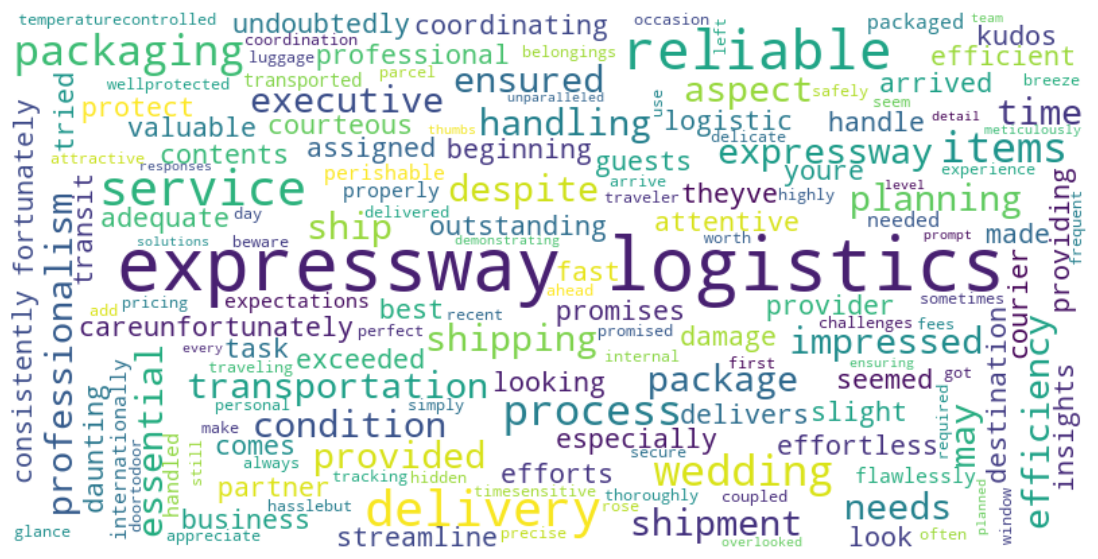

In [63]:
text = " ".join(positive_reviews_cleaned)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Based on customer feedback and sentiment analysis, the following are the key reasons contributing to positive sentiment and customer satisfaction:

    1. Professional and courteous delivery staff
    
    2. Safe and secure handling of packages
    
    3. Reliable and timely deliveries
    
    4. Well-packaged and damage-free shipments
    
    5. Consistent service quality across locations
    
    6. Appreciation for issue resolution and responsiveness

##### Let’s look at the negative reviews now, as they are the primary focus from a business perspective.

In [64]:
negative_reviews_cleaned = negative_reviews.apply(preprocess)

all_words = " ".join(negative_reviews_cleaned).split()
word_counts = Counter(all_words)

# Show top 10 most common words
print(word_counts.most_common(10))

[('the', 31), ('and', 30), ('to', 19), ('of', 19), ('my', 18), ('their', 18), ('i', 13), ('expressway', 12), ('logistics', 12), ('was', 11)]


In [65]:
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(negative_reviews_cleaned)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
print(words_freq[:20])

[('expressway logistics', np.int64(12)), ('customer service', np.int64(4)), ('delays delivery', np.int64(3)), ('failed meet', np.int64(2)), ('customer support', np.int64(2)), ('support team', np.int64(2)), ('team unresponsive', np.int64(2)), ('logistics incompetence', np.int64(2)), ('online platform', np.int64(2)), ('delivery lack', np.int64(2)), ('lack transparency', np.int64(2)), ('transparency regarding', np.int64(2)), ('regarding additional', np.int64(2)), ('additional fees', np.int64(2)), ('lack accountability', np.int64(2)), ('repeated delays', np.int64(2)), ('service team', np.int64(2)), ('disregard customer', np.int64(2)), ('customer satisfaction', np.int64(2)), ('logistics failed', np.int64(1))]


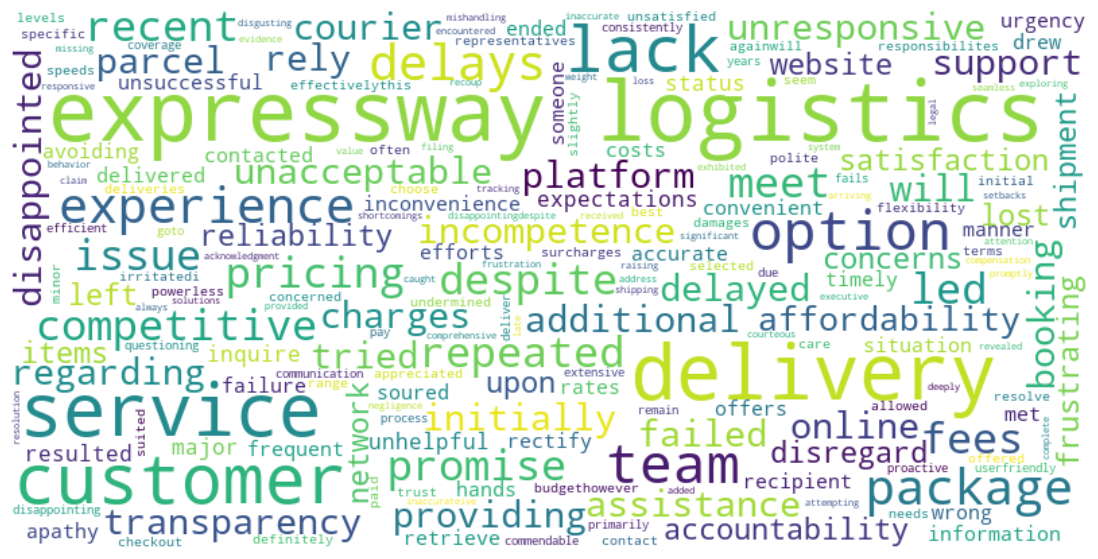

In [66]:
text = " ".join(negative_reviews_cleaned)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 3. Common Customer Complaints (Root Cause Analysis)
Based on customer feedback and sentiment analysis, the following are the most common complaints affecting customer satisfaction:

    1. Delayed deliveries
    2. Packages delivered to wrong recipients
    3, Poor accountability and lack of ownership by customer service
    4. Delayed response to complaints
    5. Inefficient resolution of issues
    6. Lack of transparency in online platform and hidden charges

#### 4. Observation & Insights (Business Perspective)

The sentiment distribution shows that 61.9% of customers are unhappy, indicating a clear service quality gap. Most negative feedback is focused on:

    Delivery delays
    Wrong deliveries
    Poor accountability from customer service
    Slow complaint handling
    Hidden or unclear charges


These issues reflect operational inefficiencies and weak service management. To restore customer trust and satisfaction, ExpressWay Logistics should focus on improving:

    Reliability (on-time delivery, correct handling)
    Responsiveness (faster complaint support)
    Transparency (clear pricing and communication)
    Ownership and accountability across service teams

#### 5. Business Use Case & Actionability

    The sentiment classification enables ExpressWay Logistics to take data-driven corrective actions:
        1. Improve Delivery Operations: Use feedback on delays and wrong deliveries to optimize routes, tracking, and logistics coordination.
        2. Enhance Customer Support: Train support teams for faster response, better accountability, and proper issue resolution.
        3. Increase Transparency: Address concerns about hidden charges and unclear communication on digital platforms.
        4. Monitor Satisfaction Over Time: Track shifts in sentiment after improvements to measure service impact.
        5. By addressing customer pain points identified through sentiment analysis, the company can reduce churn, improve brand trust, and increase repeat business.
    
    
These insights enable ExpressWay Logistics to prioritize operational improvements, monitor sentiment trends, and make data-backed decisions to enhance customer experience and brand trust.